help manual

https://github.com/ccxt/ccxt/wiki/Manual

## MAIN code

In [ ]:
import ccxt
import datetime
import pandas as pd
import pandas_ta as ta
import time 
import json

#visualisation

import matplotlib.pyplot as plt
import seaborn as sns

### PARAMETERS

exchange='bybit'
symbol = 'BTC/USDT'
timeframe = '15m'  # 1 day : 1D timeframe
size=0.0005



# Open the JSON file to read the key and secret


with open('./file.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 5000,
    },
    'apiKey': key_value,
    'secret': secret_value 
})




def fetch_price(symbol):
    price=exchange.fetchOrderBook(symbol)
    return price['bids'][0][0],price['asks'][0][0]

def check_orders(symbol):
    return exchange.fetchOpenOrders(symbol)


def logic_exec(symbol,size,timeframe,price,id):
    # Get the OHLCV (Open, High, Low, Close, Volume) data
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=None, limit=300)

    # creating dataframe of ohlcv
    df=pd.DataFrame(ohlcv)

    ### PSAR
    d=ta.psar(df[2],df[3],df[4],0.06,0.06,0.6)

    

    # taking latest value only
    latest_val=d.iloc[-1]

    ### creating logic


    if latest_val['PSARl_0.06_0.6']>0:
        if id=='':
            price,_=fetch_price(symbol)
            # order = exchange.create_order (symbol, 'market', 'buy', size,price, params={})
            order = exchange.create_order(symbol, 'market', 'buy', size)

            id=order['info']['orderId']
            print('buy')
        print('long execution inlive')
        
            
    elif latest_val['PSARs_0.06_0.6']>0:
        if id!='':
            size=exchange.fetchBalance(params={'type': 'spot',})[f"{symbol.split('/')[0]}"]['free']
            order = exchange.create_order (symbol, 'market', 'sell', size)
            id=''
            print('sell')
        print('short execution inlive')

    plt.figure(figsize=(20,10))
    sns.lineplot(x=df[0],y=df[4],data=df)
    sns.scatterplot(x=df[0],y=d['PSARs_0.06_0.6'],data=df,color='red')
    sns.scatterplot(x=df[0],y=d['PSARl_0.06_0.6'],data=df,color='green')

    plt.savefig(f'./images/plot.png')

    time.sleep(60)



    return logic_exec(symbol,size,timeframe,price,id)


logic_exec(symbol,size,timeframe,fetch_price(symbol)[0],id='1')


# Print the fetched data


In [ ]:
symbol = 'BNB/USDT'
type = 'limit'
side = 'sell'
amount = 0.01
price =200 
params = {
    'trailingPercent': 1.0, # percentage away from the current market price 1.0 is equal to 1%
    # 'trailingAmount': 100.0, # quote amount away from the current market price
    # 'trailingTriggerPrice': 44500.0, # the price to trigger activating a trailing stop order
    # 'reduceOnly': True, # set to True if you want to close a position, set to False if you want to open a new position
}
order = exchange.create_order (symbol, type, side, amount, price, params)

In [ ]:
def fetch_price(symbol):
    price=exchange.fetchOrderBook(symbol)
    return price['bids'][0][0],price['asks'][0][0]
size=exchange.fetchBalance(params={'type': 'spot',})['BNB']['free']
order = exchange.create_order (symbol, 'market', 'sell',size)

## Visualising chart

In [ ]:
import ccxt
import datetime
import pandas as pd
import pandas_ta as ta
import time 
import json

#visualisation

import matplotlib.pyplot as plt
import seaborn as sns


import json
with open('./file.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]
password=data["password"]
exchange='bybit'
symbol = 'BTC/USDT'
timeframe = '5m'  # 1 day : 1D timeframe
size=0.0005

# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 5000,
    },
    'apiKey': key_value,
    'secret': secret_value 
})

ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=None, limit=300)

# creating dataframe of ohlcv
df=pd.DataFrame(ohlcv)
df.rename(columns={0:'time',1:'Open',2:'High',3:'Low',4:'Close',5:'Volume'},inplace=True)


### PSAR
d=ta.psar(df['High'],df['Low'],df['Close'],0.06,0.06,0.6)
# Assuming df is your pandas DataFrame and 'time' is the column containing the Unix timestamps in milliseconds
df['time'] = df['time'].apply(lambda x: datetime.datetime.fromtimestamp(x / 1e3))



# taking latest value only
latest_val=d.iloc[-1]

plt.figure(figsize=(20,10))
sns.lineplot(x=df['time'],y=df['Close'],data=df)
sns.scatterplot(x=df['time'],y=d['PSARs_0.06_0.6'],data=df,color='red')
sns.scatterplot(x=df['time'],y=d['PSARl_0.06_0.6'],data=df,color='green')
plt.xlabel('DateTime')
plt.ylabel('Price')



## Testground

In [ ]:
import ccxt
import datetime
import pandas as pd
import pandas_ta as ta
import time 
import json

#visualisation

import matplotlib.pyplot as plt
import seaborn as sns

### PARAMETERS

exchange='bybit'
symbol = 'BTC/USDT'
timeframe = '15m'  # 1 day : 1D timeframe
size=0.0005



# Open the JSON file to read the key and secret


with open('./file.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 5000,
    },
    'apiKey': key_value,
    'secret': secret_value 
})




def fetch_price(symbol):
    price=exchange.fetchOrderBook(symbol)
    return price['bids'][0][0],price['asks'][0][0]

def check_orders(symbol):
    return exchange.fetchOpenOrders(symbol)


def logic_exec(symbol,size,timeframe,price,id):
    # Get the OHLCV (Open, High, Low, Close, Volume) data
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=None, limit=300)

    # creating dataframe of ohlcv
    df=pd.DataFrame(ohlcv)

    ### PSAR
    d=ta.psar(df[2],df[3],df[4],0.06,0.06,0.6)

    

    # taking latest value only
    latest_val=d.iloc[-1]

    ### creating logic


    if latest_val['PSARl_0.06_0.6']>0:
        if id=='':
            price,_=fetch_price(symbol)
            # order = exchange.create_order (symbol, 'market', 'buy', size,price, params={})
            order = exchange.create_order (symbol, 'market', 'buy', size)

            id=order['info']['orderId']
            print('buy')
        print('long execution inlive')
        
            
    elif latest_val['PSARs_0.06_0.6']>0:
        if id!='':
            size=exchange.fetchBalance(params={'type': 'spot',})[f"{symbol.split('/')[0]}"]['free']
            order = exchange.create_order (symbol, 'market', 'sell', size)
            id=''
            print('sell')
        print('short execution inlive')

    plt.figure(figsize=(20,10))
    sns.lineplot(x=df[0],y=df[4],data=df)
    sns.scatterplot(x=df[0],y=d['PSARs_0.06_0.6'],data=df,color='red')
    sns.scatterplot(x=df[0],y=d['PSARl_0.06_0.6'],data=df,color='green')

    plt.savefig(f'./images/plot.png')

    time.sleep(60)


    
    return logic_exec(symbol,size,timeframe,price,id)


logic_exec(symbol,size,timeframe,fetch_price(symbol)[0],id='1')


# Print the fetched data


## Backtesting

In [ ]:
import pandas as pd
import datetime
import ccxt
import datetime
import pandas as pd
import pandas_ta as ta
import time 
import json
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

### PARAMETERS

exchange='bybit'
symbol = 'BTC/USDT'
timeframe = '5m'  # 1 day : 1D timeframe
size=0.0005
limit=5000



# Open the JSON file to read the key and secret


with open('./file.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 5000,
    },
    'apiKey': key_value,
    'secret': secret_value 
})

ohlcv = exchange.fetch_ohlcv(symbol, timeframe, limit=limit,)

    # creating dataframe of ohlcv
df=pd.DataFrame(ohlcv)
df.rename(columns={0:'time',1:'Open',2:'High',3:'Low',4:'Close',5:'Volume'},inplace=True)


### PSAR
d=ta.psar(df['High'],df['Low'],df['Close'],0.06,0.06,0.6)
# Assuming df is your pandas DataFrame and 'time' is the column containing the Unix timestamps in milliseconds
df['time'] = df['time'].apply(lambda x: datetime.datetime.fromtimestamp(x / 1e3))
df=pd.concat([df,d],axis=1)
# Initialize a list to store the buy status
bought_status = [False]
price1 = [0]

# Calculate the gain based on the conditions
def calculate_gain(row):
    if not bought_status[0] and row['PSARl_0.06_0.6'] > 1:
        # Buy at price1
        price1[0] = row['Open']  # Assuming 'open' represents the opening price
        bought_status[0] = True
    if bought_status[0] and row['PSARs_0.06_0.6'] > 1:
        # Exit at price2
        price2 = row['Close']  # Assuming 'close' represents the closing price
        gain = (price2 - price1[0]) / price1[0]
        bought_status[0] = False
        return gain  # Return the log of the gain  # Calculate the gain in log value
    return 0  # Return 0 if the conditions are not met

# Apply the calculate_gain function to each row and create a new column 'gain_log'
df['gain'] = df.apply(calculate_gain, axis=1)
df['log_gain'] = np.log(1 + df['gain'])
net_gain = df['log_gain'].sum()
print(f'{net_gain*100}% for duration of {df["time"].iloc[0]} - {df["time"].iloc[-1]}')

#### final backtesting with all tf 

In [ ]:
import pandas as pd
import datetime
import ccxt
from datetime import datetime, timezone, timedelta

import pandas as pd
import pandas_ta as ta
import time 
import json
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

### PARAMETERS


def backtesting(from_time,symbol:str='BTC/USDT',timeframe:str='15m'):

    exchange='bybit'




    # Open the JSON file to read the key and secret


    with open('./file.json') as f:
        data = json.load(f)

    # Access the values from the loaded JSON data
    key_value = data["key"]
    secret_value = data["secret"]


    # Initialize the exchange
    exchange = eval(f'ccxt.{exchange}')({
        'enableRateLimit': True, 
        'options': {
            'adjustForTimeDifference': True,
            'recvWindow': 500000,
        },
        'apiKey': key_value,
        'secret': secret_value 
    })
    date_string=from_time
    date_object = datetime.strptime(date_string, '%Y-%m-%d')

# Set the timezone to UTC 0.0
    date_object_utc = date_object.replace(tzinfo=timezone.utc)

    # Convert to a numerical representation (timestamp)
    timestamp = date_object_utc.timestamp()
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe,limit=1000)


    # ohlcv = exchange.fetch_ohlcv(symbol, timeframe, params={'start': int(timestamp)})

        # creating dataframe of ohlcv
    df=pd.DataFrame(ohlcv)
    df.rename(columns={0:'time',1:'Open',2:'High',3:'Low',4:'Close',5:'Volume'},inplace=True)


    ### PSAR
    d=ta.psar(df['High'],df['Low'],df['Close'],0.06,0.06,0.6)
    # Assuming df is your pandas DataFrame and 'time' is the column containing the Unix timestamps in milliseconds
    df['time'] = df['time'].apply(lambda x: datetime.fromtimestamp(x / 1e3))
    df=pd.concat([df,d],axis=1)
    # Initialize a list to store the buy status
    bought_status = [False]
    price1 = [0]

    # Calculate the gain based on the conditions
    def calculate_gain(row):
        if not bought_status[0] and row['PSARl_0.06_0.6'] > 1:
            # Buy at price1
            price1[0] = row['Open']  # Assuming 'open' represents the opening price
            bought_status[0] = True
        if bought_status[0] and row['PSARs_0.06_0.6'] > 1:
            # Exit at price2
            price2 = row['Close']  # Assuming 'close' represents the closing price
            gain = (price2 - price1[0]) / price1[0]
            bought_status[0] = False
            return gain  # Return the log of the gain  # Calculate the gain in log value
        return 0  # Return 0 if the conditions are not met

    # Apply the calculate_gain function to each row and create a new column 'gain_log'
    df['gain'] = df.apply(calculate_gain, axis=1)
    df['log_gain'] = np.log(1 + df['gain'])
    net_gain = df['log_gain'].sum()
    s=f'{net_gain*100}% for duration of {df["time"].iloc[0]} - {df["time"].iloc[-1]}'
    return s

############################## backtesting ###################

symbol='ETH/USDT'
timeframe=['1m','5m','15m','30m','1h','2h']
final_result=[]
date='2024-02-11'
for i in timeframe:
    final_result.append(backtesting(symbol=symbol,timeframe=i,from_time=date)+f'timeframe {i}')




final_result

#### conversion of datetime into int format

In [ ]:
from datetime import datetime, timezone, timedelta

date_string = '2023-12-02'

# Convert the string to a datetime object
date_object = datetime.strptime(date_string, '%Y-%m-%d')

# Set the timezone to UTC 0.0
date_object_utc = date_object.replace(tzinfo=timezone.utc)

# Convert to a numerical representation (timestamp)
timestamp = date_object_utc.timestamp()

print("Numerical representation:", timestamp)


In [ ]:
# -*- coding: utf-8 -*-

import asyncio
import os
from random import randint
import sys
from pprint import pprint

root = os.path.dirname(os.path.dirname(os.path.dirname(os.path.abspath(__file__))))
sys.path.append(root + '/python')

import ccxt.async_support as ccxt  # noqa: E402


print('CCXT Version:', ccxt.__version__)

exchange = ccxt.bybit({
    'apiKey': 'YOUR_API_KEY',
    'secret': 'YOUR_SECRET_KEY',
})


# Example 1: Spot : fetch balance, create order, cancel it and check canceled orders
async def example_1():
    exchange.options['defaultType'] = 'spot'; # very important set spot as default type
    markets = await exchange.load_markets(True)

    # fetch spot balance
    balance = await exchange.fetch_balance()
    print(balance)

    # create limit order
    symbol = 'LTC/USDT'
    type = 'limit'
    side = 'buy'
    amount = 0.1
    price = 50
    create_order = await exchange.create_order(symbol, type, side, amount, price)
    print('Create order id:', create_order['id'])

    # cancel created order
    canceled_order = await exchange.cancel_order(create_order['id'], symbol)
    print(canceled_order)

    # Check canceled orders (bybit does not have a single endpoint to check orders
    # we have to choose whether to check open or closed orders and call fetch_open_orders
    # or fetch_closed_orders respectively
    orders = await exchange.fetch_closed_orders(symbol)
    print(orders)
    await exchange.close()

# -------------------------------------------------------------------------------------------

# Example 2 :: Swap : fetch balance, open a position and close it
async def example_2():
    exchange.options['defaultType'] = 'swap'; # very important set swap as default type
    markets = await exchange.load_markets(True)

    # fetch swap balance
    balance = await exchange.fetch_balance()
    print(balance)

    # create market order and open position
    symbol = 'LTC/USDT:USDT'
    type = 'market'
    side = 'buy'
    amount = 0.1
    price = None
    create_order = await exchange.create_order(symbol, type, side, amount, price)
    print('Create order id:', create_order['id'])

    # check opened position
    symbols = [ symbol ]
    positions = await exchange.fetch_positions(symbols)
    print(positions)

    # Close position by issuing a order in the opposite direction
    side = 'sell'
    params = {
        'reduce_only': True
    }
    close_position_order = await exchange.createOrder(symbol, type, side, amount, price, params)
    print(close_position_order)

# -------------------------------------------------------------------------------------------

# Example 3 :: USDC Swap : fetch balance, open a position and close it
async def example_3():
    exchange.options['defaultType'] = 'swap'; # very important set swap as default type
    markets = await exchange.load_markets(True)

    # fetch USDC swap balance
    # when no symbol is available we can show our intent
    # of using USDC endpoints by either using defaultSettle in options or
    # settle in params
    # Using Options: exchange.options['defaultSettle'] = 'USDC';
    # Using params:
    balanceParams = {
        'settle': 'USDC'
    }
    balance = await exchange.fetch_balance(balanceParams)
    print(balance)

    # create order and open position
    # taking into consideration that USDC markets do not support
    # market orders
    symbol = 'BTC/USD:USDC'
    type = 'limit'
    side = 'buy'
    amount = 0.1
    price = 15000 # adjust this accordingly
    create_order = await exchange.create_order(symbol, type, side, amount, price)
    print('Create order id:', create_order['id'])

    # check if the order was filled and the position opened
    symbols = [ symbol ]
    positions = await exchange.fetch_positions(symbols)
    print(positions)

    # Close position (assuming it was already opened) by issuing an order in the opposite direction
    side = 'sell'
    params = {
        'reduce_only': True
    }
    close_position_order = await exchange.createOrder(symbol, type, side, amount, price, params)
    print(close_position_order)

# -------------------------------------------------------------------------------------------

# Example 4 :: Future : fetch balance, create stop-order and check open stop-orders
async def example_4():
    exchange.options['defaultType'] = 'future'; # very important set future as default type
    markets = await exchange.load_markets(True)

    # fetch future balance
    balance = await exchange.fetch_balance()
    print(balance)

    # create stop-order
    symbol = 'ETH/USD:ETH-220930'
    amount = 10  # in USD for inverse futures
    price = 1200
    side = 'buy'
    type = 'limit'
    stop_order_params = {
        'position_idx': 0, # 0 One-Way Mode, 1 Buy-side, 2 Sell-side, default = 0
        'stopPrice': 1000, # mandatory for stop orders
        'basePrice': 1100  # mandatory for stop orders
    }
    stop_order = await exchange.create_order(symbol, type, side, amount, price, stop_order_params)
    print('Create order id:', stop_order['id'])

    # check opened stop-order
    open_order_params = {
        'stop': True
    }
    openOrders = await exchange.fetch_open_orders(symbol, None, None, open_order_params)
    print(openOrders)

    # cancell all open stop-orders
    cancelOrder = await exchange.cancel_all_orders(symbol, open_order_params)
    print(cancelOrder)

# -------------------------------------------------------------------------------------------

async def main():
    try:
        await example_1()
        await example_2()
        await example_3()
        await example_4()
    except Exception as e:
        print(e)
    await exchange.close()
    
    


asyncio.run(main())



### future trading code


In [ ]:

import pandas as pd
import datetime
import ccxt
from datetime import datetime, timezone, timedelta

import pandas as pd
import pandas_ta as ta
import time 
import json
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns


exchange='bybit'
symbol = 'BTC/USDT:USDT'
timeframe = '5m'  # 1 day : 1D timeframe
size=0.001
limit=5000
stoploss=60
deviation=1
unrealisedPnl=0.001

with open('./file.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 5000,
        'defaultType': 'swap',    
    },
    'apiKey': key_value,
    'secret': secret_value 
})



def fetch_price(symbol):
    price=exchange.fetchTicker(symbol.split(':')[0])['last']
    return price
    

def check_open_orders(symbol):
    return exchange.fetchOpenOrders(symbol)


def get_latest_position(symbol):
    positions = exchange.fetch_positions(symbol)
    contracts = positions[0]['contracts']
    pnl=positions[0]['info']['unrealisedPnl']
    return contracts,pnl


def open_long(symbol,amount):
    side='buy'
    type='limit'
    amount=size
    price=fetch_price(symbol)
    params={
        'stopLoss': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price-stoploss,  # limit price for a limit stop loss order
            'triggerPrice': price-stoploss+deviation,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    return order


def open_short(symbol,amount):
    side='sell'
    type='limit'
    amount=size
    price=fetch_price(symbol)
    params={
        'stopLoss': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price+stoploss,  # limit price for a limit stop loss order
            'triggerPrice': price+stoploss-deviation,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    return order




def logic_exec(symbol,size,timeframe,price,id,isLong,isShort):
    # Get the OHLCV (Open, High, Low, Close, Volume) data
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=None, limit=300)

    # creating dataframe of ohlcv
    df=pd.DataFrame(ohlcv)

    ### PSAR
    d=ta.psar(df[2],df[3],df[4],0.06,0.06,0.6)

    

    # taking latest value only
    latest_val=d.iloc[-1]

    ### creating logic
    _,latest_position_detail=get_latest_position(symbol)

    
    if latest_val['PSARl_0.06_0.6']>0:
        if id==None :
            order=open_long(symbol,size)
            id=order['id']
            isLong=True
            print('buy')

        elif id!=None and isShort:
            side = 'sell'
            type='limit'
            price=fetch_price(symbol)
            params = {
                'reduce_only': True
            }
            amount=size
            close_position_order = exchange.createOrder(symbol, type, side, amount, price, params)
            isLong=False
            id=None
            print('Long position close has been placed')

        



            #####  if condition for stop loss triggers 

            
    elif latest_val['PSARs_0.06_0.6']>0:
        if id==None:
            order=open_short(symbol,size)
            id=order['id']
            isShort=True
            print('sell')

        elif id!=None and isLong:
            side = 'buy'
            type='limit'
            amount=size
            price=fetch_price(symbol)
            params = {
                'reduce_only': True
            }
            close_position_order = exchange.createOrder(symbol, type, side, amount, price, params)
            isShort=False
            id=None
            print('Short position close has been placed')
        

    elif float(latest_position_detail)>=unrealisedPnl:
        exchange.cancel_all_orders(symbol)
        price=fetch_price(symbol)
        if isLong:
            exchange.createStopLossOrder(symbol, type='limit', side='sell', amount=size, price=price, stopLossPrice=price-stoploss+deviation)
            print('stop loss updated for long')
        elif isShort:
            exchange.createStopLossOrder(symbol, type='limit', side='buy', amount=size, price=price, stopLossPrice=price+stoploss-deviation)
            print('stop loss updated for short')




    time.sleep(3)


    
    return logic_exec(symbol,size,timeframe,price,id,isLong,isShort)


logic_exec(symbol,size,timeframe,fetch_price(symbol),id=None,isLong=False,isShort=False)


In [ ]:
exchange.fetch_position(symbol)['info']['unrealisedPnl']

In [ ]:
     """
        create a trade order
        :see: https://bybit-exchange.github.io/docs/v5/order/create-order
        :see: https://bybit-exchange.github.io/docs/v5/position/trading-stop
        :param str symbol: unified symbol of the market to create an order in
        :param str type: 'market' or 'limit'
        :param str side: 'buy' or 'sell'
        :param float amount: how much of currency you want to trade in units of base currency
        :param float [price]: the price at which the order is to be fullfilled, in units of the quote currency, ignored in market orders
        :param dict [params]: extra parameters specific to the exchange API endpoint
        :param str [params.timeInForce]: "GTC", "IOC", "FOK"
        :param bool [params.postOnly]: True or False whether the order is post-only
        :param bool [params.reduceOnly]: True or False whether the order is reduce-only
        :param str [params.positionIdx]: *contracts only*  0 for one-way mode, 1 buy side  of hedged mode, 2 sell side of hedged mode
        :param boolean [params.isLeverage]: *unified spot only* False then spot trading True then margin trading
        :param str [params.tpslMode]: *contract only* 'full' or 'partial'
        :param str [params.mmp]: *option only* market maker protection
        :param str [params.triggerDirection]: *contract only* the direction for trigger orders, 'above' or 'below'
        :param float [params.triggerPrice]: The price at which a trigger order is triggered at
        :param float [params.stopLossPrice]: The price at which a stop loss order is triggered at
        :param float [params.takeProfitPrice]: The price at which a take profit order is triggered at
        :param dict [params.takeProfit]: *takeProfit object in params* containing the triggerPrice at which the attached take profit order will be triggered
        :param float [params.takeProfit.triggerPrice]: take profit trigger price
        :param dict [params.stopLoss]: *stopLoss object in params* containing the triggerPrice at which the attached stop loss order will be triggered
        :param float [params.stopLoss.triggerPrice]: stop loss trigger price
        :param str [params.trailingAmount]: the quote amount to trail away from the current market price
        :param str [params.trailingTriggerPrice]: the price to trigger a trailing order, default uses the price argument
        :returns dict: an `order structure <https://docs.ccxt.com/#/?id=order-structure>`
        """

### final future trading code

In [ ]:

import pandas as pd
import datetime
import ccxt
from datetime import datetime, timezone, timedelta

import pandas as pd
import pandas_ta as ta
import time 
import json
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns


exchange='bybit'
symbol = 'BTC/USDT:USDT'
timeframe = '5m'  # 1 day : 1D timeframe
size=0.001
limit=5000
stoploss=50
deviation=1
unrealisedPnl=0.001

with open('./file.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 5000,
        'defaultType': 'swap',    
    },
    'apiKey': key_value,
    'secret': secret_value 
})



def fetch_price(symbol):
    # price=exchange.fetchTicker(symbol.split(':')[0])['last']
    price=exchange.fetchOrderBook(symbol)['bids'][0][0]
    return price
    

def check_open_orders(symbol):
    return exchange.fetchOpenOrders(symbol)


def get_latest_position(symbol):
    positions = exchange.fetch_positions(symbol)
    contracts = positions[0]['contracts']
    pnl=positions[0]['info']['unrealisedPnl']
    id=positions[0]['id']
    return id,contracts,pnl


def open_long(symbol,amount):
    side='buy'
    type='limit'
    amount=size
    price=fetch_price(symbol)
    params={
        'stopLoss': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price-stoploss,  # limit price for a limit stop loss order
            'triggerPrice': price-stoploss+deviation,
        },
        'takeProfit': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price+stoploss,  # limit price for a limit take profit order
            'triggerPrice': price+stoploss-deviation,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    take_profit=price+stoploss
    return order,take_profit


def open_short(symbol,amount):
    side='sell'
    type='limit'
    amount=size
    price=fetch_price(symbol)
    params={
        'stopLoss': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price+stoploss,  # limit price for a limit stop loss order
            'triggerPrice': price+stoploss-deviation,
        },
        'takeProfit': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price-stoploss,  # limit price for a limit take profit order
            'triggerPrice': price-stoploss+deviation,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    take_profit=price-stoploss
    return order,take_profit




def logic_exec(symbol,size,timeframe,price,id,isLong,isShort,trail_price,takeprofit_price):
    # Get the OHLCV (Open, High, Low, Close, Volume) data
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=None, limit=300)

    # creating dataframe of ohlcv
    df=pd.DataFrame(ohlcv)

    ### PSAR
    d=ta.psar(df[2],df[3],df[4],0.06,0.06,0.6)

    

    # taking latest value only
    latest_val=d.iloc[-1]

    ### creating logic
    position,_,latest_position_detail=get_latest_position(symbol)


    try:
        if latest_val['PSARl_0.06_0.6']>0:
            if id==None :
                order,takeprofit_price=open_long(symbol,size)
                id=order['id']
                isLong=True
                print('buy')

            

            elif id!=None and isShort:
                side = 'sell'
                type='market'
                price=fetch_price(symbol)
                params = {
                    'reduce_only': True
                }
                amount=size
                close_position_order = exchange.createOrder(symbol, type, side, amount, price, params)
                isLong=False
                id=None
                print('Long position close has been placed')

                #####  if condition for stop loss triggers 

                
        elif latest_val['PSARs_0.06_0.6']>0:
            if id==None:
                order,takeprofit_price=open_short(symbol,size)
                id=order['id']
                isShort=True
                print('sell')

        

            elif id!=None and isLong:
                side = 'buy'
                type='market'
                amount=size
                price=fetch_price(symbol)
                params = {
                    'reduce_only': True
                }
                close_position_order = exchange.createOrder(symbol, type, side, amount, price, params)
                isShort=False
                id=None
                print('Short position close has been placed')
    except:
        pass



    try:
        if float(latest_position_detail)>=unrealisedPnl:
            price=fetch_price(symbol)
            
            if isLong and trail_price<price:
                exchange.cancel_all_orders(symbol)
                exchange.createStopLossOrder(symbol, type='market', side='sell', amount=size, price=price, stopLossPrice=price-stoploss+deviation)
                exchange.createTakeProfitOrder(symbol, type='limit', side='sell', amount=size, price=takeprofit_price, takeProfitPrice=takeprofit_price-deviation)
                trail_price=price
                print('stop loss updated for long')
                
            elif isShort and trail_price>price:
                exchange.cancel_all_orders(symbol)
                exchange.createStopLossOrder(symbol, type='market', side='buy', amount=size, price=price, stopLossPrice=price+stoploss-deviation)
                exchange.createTakeProfitOrder(symbol, type='limit', side='buy', amount=size, price=takeprofit_price, takeProfitPrice=takeprofit_price+deviation)

                trail_price=price
                print('stop loss updated for short')
        
    except:
        pass
    
    time.sleep(4)


    try:
        x=exchange.fetch_positions(symbol)[0]['side']
        if x==None:
            exchange.cancel_all_orders(symbol)
            print('no position')
            id=None
            isLong=False
            isShort=False

    except:
        pass



    
    return logic_exec(symbol,size,timeframe,price,id,isLong,isShort,trail_price,takeprofit_price)


logic_exec(symbol,size,timeframe,fetch_price(symbol),id=None,isLong=False,isShort=False,trail_price=0,takeprofit_price=0)


In [ ]:

import pandas as pd
import datetime
import ccxt
from datetime import datetime, timezone, timedelta

import pandas as pd
import pandas_ta as ta
import time 
import json
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns


exchange='bybit'
symbol = 'BTC/USDT:USDT'
timeframe = '1m'  # 1 day : 1D timeframe
size=0.001
limit=5000
stoploss=30
deviation=1
unrealisedPnl=0.001

with open('./file.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 5000,
        'defaultType': 'swap',    
    },
    'apiKey': key_value,
    'secret': secret_value 
})



def fetch_price(symbol):
    # price=exchange.fetchTicker(symbol.split(':')[0])['last']
    price=exchange.fetchOrderBook(symbol)['bids'][0][0]
    return price
    

def check_open_orders(symbol):
    return exchange.fetchOpenOrders(symbol)


def get_latest_position(symbol):
    positions = exchange.fetch_positions(symbol)
    contracts = positions[0]['contracts']
    pnl=positions[0]['info']['unrealisedPnl']
    id=positions[0]['id']
    return id,contracts,pnl


def open_long(symbol,amount):
    side='buy'
    type='limit'
    amount=size
    price=fetch_price(symbol)
    params={
        'stopLoss': {
            'type': 'market',  # or 'market', this field is not necessary if limit price is specified
            #'price': price-stoploss,  # limit price for a limit stop loss order
            'triggerPrice': price-stoploss,
        },
        'takeProfit': {
            'type': 'market',  # or 'market', this field is not necessary if limit price is specified
            #'price': price+stoploss-10,  # limit price for a limit take profit order
            'triggerPrice': price+stoploss-10,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    take_profit=price+stoploss
    return order,take_profit


def open_short(symbol,amount):
    side='sell'
    type='limit'
    amount=size
    price=fetch_price(symbol)
    params={
        'stopLoss': {
            'type': 'market',  # or 'market', this field is not necessary if limit price is specified
            #'price': price+stoploss,  # limit price for a limit stop loss order
            'triggerPrice': price+stoploss,
        },
        'takeProfit': {
            'type': 'market',  # or 'market', this field is not necessary if limit price is specified
            #'price': price-stoploss+10,  # limit price for a limit take profit order
            'triggerPrice': price-stoploss+10,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    take_profit=price-stoploss
    return order,take_profit




def logic_exec(symbol,size,timeframe,price,id,isLong,isShort,trail_price,takeprofit_price):
    # Get the OHLCV (Open, High, Low, Close, Volume) data
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=None, limit=300)

    # creating dataframe of ohlcv
    df=pd.DataFrame(ohlcv)

    ### PSAR
    d=ta.psar(df[2],df[3],df[4],0.06,0.06,0.6)

    

    # taking latest value only
    latest_val=d.iloc[-1]

    ### creating logic
    position,_,latest_position_detail=get_latest_position(symbol)


    try:
        if latest_val['PSARl_0.06_0.6']>0:
            if id==None :
                order,takeprofit_price=open_long(symbol,size)
                id=order['id']
                isLong=True
                print('buy')

            

            elif id!=None and isShort:
                side = 'sell'
                type='market'
                price=fetch_price(symbol)
                params = {
                    'reduce_only': True
                }
                amount=size
                close_position_order = exchange.createOrder(symbol, type, side, amount, price, params)
                isLong=False
                id=None
                print('Long position close has been placed')

                #####  if condition for stop loss triggers 

                
        elif latest_val['PSARs_0.06_0.6']>0:
            if id==None:
                order,takeprofit_price=open_short(symbol,size)
                id=order['id']
                isShort=True
                print('sell')

        

            elif id!=None and isLong:
                side = 'buy'
                type='market'
                amount=size
                price=fetch_price(symbol)
                params = {
                    'reduce_only': True
                }
                close_position_order = exchange.createOrder(symbol, type, side, amount, price, params)
                isShort=False
                id=None
                print('Short position close has been placed')
    except:
        id=None
        isLong=False
        isShort=False
        pass



    # try:
    #     if float(latest_position_detail)>=unrealisedPnl:
    #         price=fetch_price(symbol)
            
    #         if isLong and trail_price<price:
    #             exchange.cancel_all_orders(symbol)
    #             exchange.createStopLossOrder(symbol, type='market', side='sell', amount=size, price=price, stopLossPrice=price-stoploss+deviation)
    #             exchange.createTakeProfitOrder(symbol, type='limit', side='sell', amount=size, price=takeprofit_price, takeProfitPrice=takeprofit_price-deviation)
    #             trail_price=price
    #             print('stop loss updated for long')
                
    #         elif isShort and trail_price>price:
    #             exchange.cancel_all_orders(symbol)
    #             exchange.createStopLossOrder(symbol, type='market', side='buy', amount=size, price=price, stopLossPrice=price+stoploss-deviation)
    #             exchange.createTakeProfitOrder(symbol, type='limit', side='buy', amount=size, price=takeprofit_price, takeProfitPrice=takeprofit_price+deviation)

    #             trail_price=price
    #             print('stop loss updated for short')
        
    # except:
    #     pass
    
    time.sleep(4)


    # try:
    #     x=exchange.fetch_positions(symbol)[0]['side']
    #     if x==None:
    #         exchange.cancel_all_orders(symbol)
    #         print('no position')
    #         id=None
    #         isLong=False
    #         isShort=False

    # except:
    #     pass



    
    return logic_exec(symbol,size,timeframe,price,id,isLong,isShort,trail_price,takeprofit_price)


logic_exec(symbol,size,timeframe,fetch_price(symbol),id=None,isLong=False,isShort=False,trail_price=0,takeprofit_price=0)


In [ ]:

import pandas as pd
import datetime
import ccxt
from datetime import datetime, timezone, timedelta

import pandas as pd
import pandas_ta as ta
import time 
import json
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns


exchange='bybit'
symbol = 'BTC/USDT:USDT'
timeframe = '1m'  # 1 day : 1D timeframe
size=0.001
limit=5000
stoploss=50
deviation=1
unrealisedPnl=0.001

with open('./file.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 5000,
        'defaultType': 'swap',    
    },
    'apiKey': key_value,
    'secret': secret_value 
})



def fetch_price(symbol):
    # price=exchange.fetchTicker(symbol.split(':')[0])['last']
    price=exchange.fetchOrderBook(symbol)['bids'][0][0]
    return price
    

def check_open_orders(symbol):
    return exchange.fetchOpenOrders(symbol)


def get_latest_position(symbol):
    positions = exchange.fetch_positions(symbol)
    contracts = positions[0]['contracts']
    pnl=positions[0]['info']['unrealisedPnl']
    id=positions[0]['id']
    return id,contracts,pnl


def open_long(symbol,amount):
    side='buy'
    type='limit'
    amount=size
    price=fetch_price(symbol)
    params={
        'stopLoss': {
            'type': 'market',  # or 'market', this field is not necessary if limit price is specified
            #'price': price-stoploss,  # limit price for a limit stop loss order
            'triggerPrice': price-stoploss,
        },
        'takeProfit': {
            'type': 'market',  # or 'market', this field is not necessary if limit price is specified
            #'price': price+stoploss-10,  # limit price for a limit take profit order
            'triggerPrice': price+stoploss-30,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    take_profit=price+stoploss
    return order,take_profit


def open_short(symbol,amount):
    side='sell'
    type='limit'
    amount=size
    price=fetch_price(symbol)
    params={
        'stopLoss': {
            'type': 'market',  # or 'market', this field is not necessary if limit price is specified
            #'price': price+stoploss,  # limit price for a limit stop loss order
            'triggerPrice': price+stoploss,
        },
        'takeProfit': {
            'type': 'market',  # or 'market', this field is not necessary if limit price is specified
            #'price': price-stoploss+10,  # limit price for a limit take profit order
            'triggerPrice': price-stoploss+30,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    take_profit=price-stoploss
    return order,take_profit




def logic_exec(symbol,size,timeframe,price):
    # Get the OHLCV (Open, High, Low, Close, Volume) data
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=None, limit=300)

    # creating dataframe of ohlcv
    df=pd.DataFrame(ohlcv)

    ### PSAR
    d=ta.psar(df[2],df[3],df[4],0.06,0.06,0.6)

    

    # taking latest value only
    latest_val=d.iloc[-1]

    ### creating logic
    position,_,latest_position_detail=get_latest_position(symbol)

    if latest_val['PSARr_0.06_0.6']>0:
    
        if latest_val['PSARl_0.06_0.6']>0:
            
            order,takeprofit_price=open_long(symbol,size)
            print('buy')
            time.sleep(60)

            

                
        elif latest_val['PSARs_0.06_0.6']>0:
            
            order,takeprofit_price=open_short(symbol,size)
            print('sell')
            time.sleep(60)

        
    
    time.sleep(10)


    
    return logic_exec(symbol,size,timeframe,price)


logic_exec(symbol,size,timeframe,fetch_price(symbol))


In [ ]:

import pandas as pd
import datetime
import ccxt
from datetime import datetime, timezone, timedelta

import pandas as pd
import pandas_ta as ta
import time 
import json
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns


exchange='bybit'
symbol = 'BTC/USDT:USDT'
timeframe = '3m'  # 1 day : 1D timeframe
size=0.001
limit=50000
stoploss=20
deviation=1
unrealisedPnl=0.001

with open('./file.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    #'enableRateLimit': True, 
    'options': {
        # 'adjustForTimeDifference': True,
        # 'recvWindow': 5000,
        'defaultType': 'swap',    
    },
    'apiKey': key_value,
    'secret': secret_value 
})



def fetch_price(symbol):
    price=exchange.fetchTicker(symbol.split(':')[0])['last']
    return price
    

def check_open_orders(symbol):
    return exchange.fetchOpenOrders(symbol)


def get_latest_position(symbol):
    positions = exchange.fetch_positions(symbol)
    contracts = positions[0]['contracts']
    pnl=positions[0]['info']['unrealisedPnl']
    return contracts,pnl


def open_long(symbol,amount):
    side='buy'
    type='limit'
    amount=size
    price=fetch_price(symbol)
    params={
        'TakeProfit': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price+stoploss,  # limit price for a limit stop loss order
            'triggerPrice': price+stoploss,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    return order


def open_short(symbol,amount):
    side='sell'
    type='limit'
    amount=size
    price=fetch_price(symbol)
    params={
        'TakeProfit': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price-stoploss,  # limit price for a limit stop loss order
            'triggerPrice': price-stoploss+deviation,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    return order




def logic_exec(symbol,size,timeframe,price,id,isLong,isShort):
    # Get the OHLCV (Open, High, Low, Close, Volume) data
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=None, limit=300)

    # creating dataframe of ohlcv
    df=pd.DataFrame(ohlcv)

    ### PSAR
    d=ta.psar(df[2],df[3],df[4],0.06,0.06,0.6)
    d1=ta.ema(d[4],13)

    

    # taking latest value only
    latest_val=d.iloc[-1]

    ### creating logic
    _,latest_position_detail=get_latest_position(symbol)

    
    if latest_val['PSARl_0.06_0.6']>0 and latest_val['PSARr_0.06_0.6']==1:
        if id==None :
            order=open_long(symbol,size)
            id=order['id']
            isLong=True
            print('buy')

        elif id!=None and isShort:
            side = 'sell'
            type='limit'
            price=fetch_price(symbol)
            params = {
                'reduce_only': True
            }
            amount=size
            exchange.createOrder(symbol, type, side, amount, price, params)
            isLong=False
            id=None
            print('Long position close has been placed')

        



            #####  if condition for stop loss triggers 

            
    elif latest_val['PSARs_0.06_0.6']>0 and latest_val['PSARr_0.06_0.6']==1:
        if id==None:
            order=open_short(symbol,size)
            id=order['id']
            isShort=True
            print('sell')

        elif id!=None and isLong:
            side = 'buy'
            type='limit'
            amount=size
            price=fetch_price(symbol)
            params = {
                'reduce_only': True
            }
            exchange.createOrder(symbol, type, side, amount, price, params)
            isShort=False
            id=None
            print('Short position close has been placed')
        




    time.sleep(5)


    
    return logic_exec(symbol,size,timeframe,price,id,isLong,isShort)


logic_exec(symbol,size,timeframe,fetch_price(symbol),id=None,isLong=False,isShort=False)


In [ ]:

import pandas as pd
import datetime
import ccxt
from datetime import datetime, timezone, timedelta

import pandas as pd
import pandas_ta as ta
import time 
import json
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns


exchange='bybit'
symbol = 'BTC/USDT:USDT'
timeframe = '3m'  # 1 day : 1D timeframe
size=0.001
limit=5000
stoploss=20
takeprofit=20
deviation=1
unrealisedPnl=0.001

with open('./file.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 500000,
        'defaultType': 'swap',    
        'timeDifference': 5000
    },
    'apiKey': key_value,
    'secret': secret_value 
})



def fetch_price(symbol):
    # price=exchange.fetchTicker(symbol.split(':')[0])['last']
    price=exchange.fetchTicker(symbol)['info']['lastPrice']

    return float(price)
    

def check_open_orders(symbol):
    return exchange.fetchOpenOrders(symbol)


def get_latest_position(symbol):
    positions = exchange.fetch_positions(symbol)
    contracts = positions[0]['contracts']
    pnl=positions[0]['info']['unrealisedPnl']
    return contracts,pnl


def open_long(symbol,amount):
    side='buy'
    type='limit'
    #type='market'

    amount=size
    price=fetch_price(symbol)+deviation
    params={
        'takeProfit': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price+stoploss,  # limit price for a limit stop loss order
            'triggerPrice': price+stoploss,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    return order


def open_short(symbol,amount):
    side='sell'
    type='limit'
    # type='market'

    amount=size
    price=fetch_price(symbol)-deviation
    params={
    
        'takeProfit': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price-takeprofit,  # limit price for a limit stop loss order
            'triggerPrice': price-takeprofit+deviation,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    return order




def logic_exec(symbol,size,timeframe,price,id,isLong,isShort):
    # Get the OHLCV (Open, High, Low, Close, Volume) data
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=None, limit=300)

    # creating dataframe of ohlcv
    df=pd.DataFrame(ohlcv)

    ### PSAR
    d=ta.psar(df[2],df[3],df[4],0.06,0.06,0.6)
    d1=ta.ema(df[4][-14:-1],13).iloc[-1]

    

    # taking latest value only
    latest_val=d.iloc[-1]

    ### creating logic
    _,latest_position_detail=get_latest_position(symbol)


    
    if latest_val['PSARl_0.06_0.6']>0 and latest_val['PSARr_0.06_0.6']==1:
        if id==None and df[4].iloc[-1]>d1:
            exchange.cancel_all_orders(symbol)
            order=open_long(symbol,size)
            id=order['id']
            isLong=True
            print('buy')

        elif id!=None and isShort:
            side = 'buy'
            type='limit'
            price=fetch_price(symbol)
            params = {
                'reduce_only': True
            }
            amount=size
            exchange.createOrder(symbol, type, side, amount, price, params)
            isLong=False
            id=None
            print('Long position close has been placed')

        



            #####  if condition for stop loss triggers 

            
    elif latest_val['PSARs_0.06_0.6']>0 and latest_val['PSARr_0.06_0.6']==1:
        if id==None and df[4].iloc[-1]<d1:
            exchange.cancel_all_orders(symbol)
            order=open_short(symbol,size)
            id=order['id']
            isShort=True
            print('sell')

        elif id!=None and isLong:
            side = 'sell'
            type='limit'
            amount=size
            price=fetch_price(symbol)
            params = {
                'reduce_only': True
            }
            exchange.createOrder(symbol, type, side, amount, price, params)
            isShort=False
            id=None
            print('Short position close has been placed')
        




    time.sleep(10)
    x=exchange.fetch_positions(symbol)[0]['side']
    if x==None:
        exchange.cancel_all_orders(symbol)
        print('no position')
        id=None
        isLong=False
        isShort=False
    elif x!=None:
        time.sleep(180)




    
    return logic_exec(symbol,size,timeframe,price,id,isLong,isShort)


logic_exec(symbol,size,timeframe,fetch_price(symbol),id=None,isLong=False,isShort=False)



### MEXC

In [ ]:

import pandas as pd
import datetime
import ccxt
from datetime import datetime, timezone, timedelta

import pandas as pd
import pandas_ta as ta
import time 
import json
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns


exchange='mexc'
symbol = 'BTC/USDT:USDT'
timeframe = '5m'  # 1 day : 1D timeframe
size=0.001
limit=5000
stoploss=20
takeprofit=20
deviation=1
unrealisedPnl=0.001

with open('./file_mexc.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 50000,
        'defaultType': 'swap',    
        'timeDifference': 5000
    },
    'apiKey': key_value,
    'secret': secret_value 
})



def fetch_price(symbol):
    # price=exchange.fetchTicker(symbol.split(':')[0])['last']
    price=exchange.fetchTicker(symbol)['info']['lastPrice']
    

    return float(price)
    

def check_open_orders(symbol):
    return exchange.fetchOpenOrders(symbol)


def get_latest_position(symbol):
    positions = exchange.fetch_positions(symbol)
    contracts = positions[0]['contracts']
    pnl=positions[0]['info']['unrealisedPnl']
    return contracts,pnl


def open_long(symbol,amount):
    side='buy'
    type='limit'
    #type='market'

    amount=size
    price=fetch_price(symbol)+deviation
    params={
        'takeProfit': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price+stoploss,  # limit price for a limit stop loss order
            'triggerPrice': price+stoploss,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    return order


def open_short(symbol,amount):
    side='sell'
    type='limit'
    # type='market'

    amount=size
    price=fetch_price(symbol)-deviation
    params={
    
        'takeProfit': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price-takeprofit,  # limit price for a limit stop loss order
            'triggerPrice': price-takeprofit+deviation,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    return order




def logic_exec(symbol,size,timeframe,price,id,isLong,isShort):
    # Get the OHLCV (Open, High, Low, Close, Volume) data
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=None, limit=300)

    # creating dataframe of ohlcv
    df=pd.DataFrame(ohlcv)

    ### PSAR
    d=ta.psar(df[2],df[3],df[4],0.06,0.06,0.6)
    d1=ta.ema(df[4][-14:-1],13).iloc[-1]

    

    # taking latest value only
    latest_val=d.iloc[-1]

        
    plt.figure(figsize=(20,10))
    sns.lineplot(x=df[0],y=df[4],data=df)
    sns.scatterplot(x=df[0],y=d['PSARs_0.06_0.6'],data=df,color='red')
    sns.scatterplot(x=df[0],y=d['PSARl_0.06_0.6'],data=df,color='green')
    plt.xlabel('DateTime')
    plt.ylabel('Price')
    plt.savefig('img.jpg')
    plt.close()


    ### creating logic
    #_,latest_position_detail=get_latest_position(symbol)


    
    if latest_val['PSARl_0.06_0.6']>0 and latest_val['PSARr_0.06_0.6']==1:
        if id==None and df[4].iloc[-1]>d1:
            exchange.cancel_all_orders(symbol)
            order=open_long(symbol,size)
            id=order['id']
            isLong=True
            print('buy')

        elif id!=None and isShort:
            side = 'buy'
            type='limit'
            price=fetch_price(symbol)
            params = {
                'reduce_only': True
            }
            amount=size
            exchange.createOrder(symbol, type, side, amount, price, params)
            isLong=False
            id=None
            print('Long position close has been placed')

        



            #####  if condition for stop loss triggers 

            
    elif latest_val['PSARs_0.06_0.6']>0 and latest_val['PSARr_0.06_0.6']==1:
        if id==None and df[4].iloc[-1]<d1:
            exchange.cancel_all_orders(symbol)
            order=open_short(symbol,size)
            id=order['id']
            isShort=True
            print('sell')

        elif id!=None and isLong:
            side = 'sell'
            type='limit'
            amount=size
            price=fetch_price(symbol)
            params = {
                'reduce_only': True
            }
            exchange.createOrder(symbol, type, side, amount, price, params)
            isShort=False
            id=None
            print('Short position close has been placed')
        




    time.sleep(60)
    x=exchange.fetch_position(symbol)
    if x==None:
        exchange.cancel_all_orders(symbol)
        print('no position')
        id=None
        isLong=False
        isShort=False
    elif x!=None:
        time.sleep(180)




    
    return logic_exec(symbol,size,timeframe,price,id,isLong,isShort)


logic_exec(symbol,size,timeframe,fetch_price(symbol),id=None,isLong=False,isShort=False)



In [ ]:

import pandas as pd
import datetime
import ccxt
from datetime import datetime, timezone, timedelta

import pandas as pd
import pandas_ta as ta
import time 
import json
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns


exchange='mexc'
symbol = 'BTC/USDT:USDT'
timeframe = '5m'  # 1 day : 1D timeframe
size=0.001
limit=5000
stoploss=20
takeprofit=20
deviation=1
unrealisedPnl=0.001

with open('./file_mexc.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 50000,
        # 'defaultType': 'swap',    
        'timeDifference': 5000
    },
    'apiKey': key_value,
    'secret': secret_value 
})

In [ ]:
exchange.create_swap_order('BTC/USDT:USDT',side=2,amount=0.001,price=60000,type='limit')

In [ ]:
side='sell'
type='limit'
# type='market'
amount=0.001
price=fetch_price(symbol)-deviation
params={

    'takeProfit': {
        'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
        'price': price-takeprofit,  # limit price for a limit stop loss order
        'triggerPrice': price-takeprofit+deviation,
    },
    
}
order = exchange.create_swap_order('BTC/USDT:USDT', type, 3, 0.001, 60000)


In [ ]:
exchange.symbols

In [ ]:

import pandas as pd
import datetime
import ccxt
from datetime import datetime, timezone, timedelta

import pandas as pd
import pandas_ta as ta
import time 
import json
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns


exchange='bitmex'
symbol = 'BTC/USDT:USDT'
timeframe = '5m'  # 1 day : 1D timeframe
size=1000
limit=5000
stoploss=20
takeprofit=20
deviation=1
unrealisedPnl=0.001

with open('./file_bitmex.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 50000,
        'defaultType': 'future',    
        'timeDifference': 5000
    },
    'apiKey': key_value,
    'secret': secret_value 
})



def fetch_price(symbol):
    # price=exchange.fetchTicker(symbol.split(':')[0])['last']
    price=exchange.fetchTicker(symbol)['info']['lastPrice']
    

    return float(price)
    

def check_open_orders(symbol):
    return exchange.fetchOpenOrders(symbol)


def get_latest_position(symbol):
    positions = exchange.fetch_positions(symbol)
    contracts = positions[0]['contracts']
    pnl=positions[0]['info']['unrealisedPnl']
    return contracts,pnl


def open_long(symbol,amount):
    side='buy'
    type='limit'
    #type='market'

    amount=size
    price=fetch_price(symbol)+deviation
    params={
        'takeProfit': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price+stoploss,  # limit price for a limit stop loss order
            'triggerPrice': price+stoploss,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    return order


def open_short(symbol,amount):
    side='sell'
    type='limit'
    # type='market'

    amount=size
    price=fetch_price(symbol)-deviation
    params={
    
        'takeProfit': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price-takeprofit,  # limit price for a limit stop loss order
            'triggerPrice': price-takeprofit+deviation,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    return order




def logic_exec(symbol,size,timeframe,price,id,isLong,isShort):
    # Get the OHLCV (Open, High, Low, Close, Volume) data
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=None, limit=300)

    # creating dataframe of ohlcv
    df=pd.DataFrame(ohlcv)

    ### PSAR
    d=ta.psar(df[2],df[3],df[4],0.06,0.06,0.6)
    d1=ta.ema(df[4][-14:-1],13).iloc[-1]

    

    # taking latest value only
    latest_val=d.iloc[-1]

        
    plt.figure(figsize=(20,10))
    sns.lineplot(x=df[0],y=df[4],data=df)
    sns.scatterplot(x=df[0],y=d['PSARs_0.06_0.6'],data=df,color='red')
    sns.scatterplot(x=df[0],y=d['PSARl_0.06_0.6'],data=df,color='green')
    plt.xlabel('DateTime')
    plt.ylabel('Price')
    plt.savefig('img.jpg')
    plt.close()


    ### creating logic
    #_,latest_position_detail=get_latest_position(symbol)


    
    if latest_val['PSARl_0.06_0.6']>0 and latest_val['PSARr_0.06_0.6']==1:
        if id==None and df[4].iloc[-1]>d1:
            exchange.cancel_all_orders(symbol)
            order=open_long(symbol,size)
            id=order['id']
            isLong=True
            print('buy')

        elif id!=None and isShort:
            side = 'buy'
            type='limit'
            price=fetch_price(symbol)
            params = {
                'reduce_only': True
            }
            amount=size
            exchange.createOrder(symbol, type, side, amount, price, params)
            isLong=False
            id=None
            print('Long position close has been placed')

        



            #####  if condition for stop loss triggers 

            
    elif latest_val['PSARs_0.06_0.6']>0 and latest_val['PSARr_0.06_0.6']==1:
        if id==None and df[4].iloc[-1]<d1:
            exchange.cancel_all_orders(symbol)
            order=open_short(symbol,size)
            id=order['id']
            isShort=True
            print('sell')

        elif id!=None and isLong:
            side = 'sell'
            type='limit'
            amount=size
            price=fetch_price(symbol)
            params = {
                'reduce_only': True
            }
            exchange.createOrder(symbol, type, side, amount, price, params)
            isShort=False
            id=None
            print('Short position close has been placed')
        




    time.sleep(60)
    x=exchange.fetchMyTrades(symbol)
    if x==[]:
        exchange.cancel_all_orders(symbol)
        print('no position')
        id=None
        isLong=False
        isShort=False
    elif x!=None:
        time.sleep(180)




    
    return logic_exec(symbol,size,timeframe,price,id,isLong,isShort)


logic_exec(symbol,size,timeframe,fetch_price(symbol),id=None,isLong=False,isShort=False)



In [ ]:
exchange.cancelAllOrders()

In [ ]:
exchange.fetchPositions()

In [ ]:
exchange.fetchClosedOrders(symbol)

In [ ]:
exchange.fetchMyTrades(symbol)[0]


In [ ]:
side='buy'
type='limit'
amount=1000
price=61000
params={
    'takeProfit': {
        'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
        'price': 63000,  # limit price for a limit stop loss order
        'triggerPrice': 63000,
    },
}
exchange.createOrder(symbol, type, side, amount, price, params)

In [ ]:
x=exchange.fetchPosition(symbol)

In [ ]:
exchange.fetchTicker(symbol)['info']['lastPrice']

In [ ]:
x['info']

In [ ]:

import pandas as pd
import datetime
import ccxt
from datetime import datetime, timezone, timedelta

import pandas as pd
import pandas_ta as ta
import time 
import json
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns


exchange='bitmex'
symbol = 'BTC/USDT:USDT'
timeframe = '1m'  # 1 day : 1D timeframe
size=0.001
limit=5000
stoploss=20
takeprofit=20
deviation=1
unrealisedPnl=0.001

with open('./file_bitmex.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 50000,
        'defaultType': 'future',    
        'timeDifference': 5000
    },
    'apiKey': key_value,
    'secret': secret_value 
})


: 

In [ ]:

import pandas as pd
import datetime
import ccxt
from datetime import datetime, timezone, timedelta

import pandas as pd
import pandas_ta as ta
import time 
import json
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns


exchange='mexc'
symbol = 'BTC/USDT'
timeframe = '5m'  # 1 day : 1D timeframe
size=0.001
limit=5000
stoploss=20
takeprofit=20
deviation=1
unrealisedPnl=0.001

with open('./file_mexc.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 50000,
        'defaultType': 'swap',    
        'timeDifference': 5000
    },
    'apiKey': key_value,
    'secret': secret_value 
})



def fetch_price(symbol):
    # price=exchange.fetchTicker(symbol.split(':')[0])['last']
    price=exchange.fetchTicker(symbol)['info']['lastPrice']

    return float(price)
    

def check_open_orders(symbol):
    return exchange.fetchOpenOrders(symbol)


def get_latest_position(symbol):
    positions = exchange.fetch_positions(symbol)
    contracts = positions[0]['contracts']
    pnl=positions[0]['info']['unrealisedPnl']
    return contracts,pnl


def open_long(symbol,amount):
    side='buy'
    type='limit'
    #type='market'

    amount=size
    price=fetch_price(symbol)+deviation
    params={
        'takeProfit': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price+stoploss,  # limit price for a limit stop loss order
            'triggerPrice': price+stoploss,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    return order


def open_short(symbol,amount):
    side='sell'
    type='limit'
    # type='market'

    amount=size
    price=fetch_price(symbol)-deviation
    params={
    
        'takeProfit': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price-takeprofit,  # limit price for a limit stop loss order
            'triggerPrice': price-takeprofit+deviation,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    return order




def logic_exec(symbol,size,timeframe,price,id,isLong,isShort):
    # Get the OHLCV (Open, High, Low, Close, Volume) data
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=None, limit=300)

    # creating dataframe of ohlcv
    df=pd.DataFrame(ohlcv)

    ### PSAR
    d=ta.psar(df[2],df[3],df[4],0.06,0.06,0.6)
    d1=ta.ema(df[4][-14:-1],13).iloc[-1]

    

    # taking latest value only
    latest_val=d.iloc[-1]

    ### creating logic



    
    if latest_val['PSARl_0.06_0.6']>0 and latest_val['PSARr_0.06_0.6']==1:
        if id==None and df[4].iloc[-1]>d1:
            exchange.cancel_all_orders(symbol)
            order=open_long(symbol,size)
            id=order['id']
            isLong=True
            print('buy')

        elif id!=None and isShort:
            side = 'buy'
            type='limit'
            price=fetch_price(symbol)
            params = {
                'reduce_only': True
            }
            amount=size
            exchange.createOrder(symbol, type, side, amount, price, params)
            isLong=False
            id=None
            print('Long position close has been placed')

        



            #####  if condition for stop loss triggers 

            
    elif latest_val['PSARs_0.06_0.6']>0 and latest_val['PSARr_0.06_0.6']==1:
        if id==None and df[4].iloc[-1]<d1:
            exchange.cancel_all_orders(symbol)
            order=open_short(symbol,size)
            id=order['id']
            isShort=True
            print('sell')

        elif id!=None and isLong:
            side = 'sell'
            type='limit'
            amount=size
            price=fetch_price(symbol)
            params = {
                'reduce_only': True
            }
            exchange.createOrder(symbol, type, side, amount, price, params)
            isShort=False
            id=None
            print('Short position close has been placed')
        




    time.sleep(10)
    x=exchange.fetch_positions(symbol)[0]['side']
    if x==None:
        exchange.cancel_all_orders(symbol)
        print('no position')
        id=None
        isLong=False
        isShort=False
    elif x!=None:
        time.sleep(180)




    
    return logic_exec(symbol,size,timeframe,price,id,isLong,isShort)


logic_exec(symbol,size,timeframe,fetch_price(symbol),id=None,isLong=False,isShort=False)



## Bybit

In [ ]:

import pandas as pd
import datetime
import ccxt
from datetime import datetime, timezone, timedelta

import pandas as pd
import pandas_ta as ta
import time 
import json
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns


exchange='bybit'
symbol = 'BTC/USDT:USDT'
timeframe = '5m'  # 1 day : 1D timeframe
size=0.001
limit=5000
stoploss=20
takeprofit=20
deviation=1
unrealisedPnl=0.001

with open('./file_mexc.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 500000,
        'defaultType': 'swap',    
        'timeDifference': 5000
    },
    'apiKey': key_value,
    'secret': secret_value 
})



def fetch_price(symbol):
    price=exchange.fetchTicker(symbol.split(':')[0])['last']
    return price
    

def check_open_orders(symbol):
    return exchange.fetchOpenOrders(symbol)


def get_latest_position(symbol):
    positions = exchange.fetch_positions(symbol)
    contracts = positions[0]['contracts']
    pnl=positions[0]['info']['unrealisedPnl']
    return contracts,pnl


def open_long(symbol,amount):
    side='buy'
    type='limit'
    amount=size
    price=fetch_price(symbol)
    params={
        'TakeProfit': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price+stoploss,  # limit price for a limit stop loss order
            'triggerPrice': price+stoploss,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    return order


def open_short(symbol,amount):
    side='sell'
    type='limit'
    amount=size
    price=fetch_price(symbol)
    params={
        'TakeProfit': {
            'type': 'limit',  # or 'market', this field is not necessary if limit price is specified
            'price': price-takeprofit,  # limit price for a limit stop loss order
            'triggerPrice': price-takeprofit+deviation,
        },
        
    }
    order = exchange.create_order(symbol, type, side, amount, price,params)
    return order




def logic_exec(symbol,size,timeframe,price,id,isLong,isShort):
    # Get the OHLCV (Open, High, Low, Close, Volume) data
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=None, limit=300)

    # creating dataframe of ohlcv
    df=pd.DataFrame(ohlcv)

    ### PSAR
    d=ta.psar(df[2],df[3],df[4],0.06,0.06,0.6)
    d1=ta.ema(df[4][-14:-1],13).iloc[-1]

    

    # taking latest value only
    latest_val=d.iloc[-1]

    ### creating logic
    _,latest_position_detail=get_latest_position(symbol)

    print('program is running')

    
    if latest_val['PSARl_0.06_0.6']>0 and latest_val['PSARr_0.06_0.6']==1:
        if id==None and df[4].iloc[-1]>d1:
            order=open_long(symbol,size)
            id=order['id']
            isLong=True
            print('buy')

        elif id!=None and isShort:
            side = 'sell'
            type='limit'
            price=fetch_price(symbol)
            params = {
                'reduce_only': True
            }
            amount=size
            exchange.createOrder(symbol, type, side, amount, price, params)
            isLong=False
            id=None
            print('Long position close has been placed')

        



            #####  if condition for stop loss triggers 

            
    elif latest_val['PSARs_0.06_0.6']>0 and latest_val['PSARr_0.06_0.6']==1:
        if id==None and df[4].iloc[-1]<d1:
            order=open_short(symbol,size)
            id=order['id']
            isShort=True
            print('sell')

        elif id!=None and isLong:
            side = 'buy'
            type='limit'
            amount=size
            price=fetch_price(symbol)
            params = {
                'reduce_only': True
            }
            exchange.createOrder(symbol, type, side, amount, price, params)
            isShort=False
            id=None
            print('Short position close has been placed')
        




    time.sleep(5)


    
    return logic_exec(symbol,size,timeframe,price,id,isLong,isShort)

if __name__ == '__main__':

    logic_exec(symbol,size,timeframe,fetch_price(symbol),id=None,isLong=False,isShort=False)



## Bitmex

In [2]:

import pandas as pd
import datetime
import ccxt
from datetime import datetime, timezone, timedelta

import pandas as pd
import pandas_ta as ta
import time 
import json
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns


exchange='bitmex'
symbol = 'BTC/USDT:USDT'
timeframe = '5m'  # 1 day : 1D timeframe
size=1000
limit=5000
stoploss=20
takeprofit=20
deviation=1
unrealisedPnl=0.001

with open('./file_bitmex.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 50000,
        'defaultType': 'swap',    
        'timeDifference': 5000
    },
    'apiKey': key_value,
    'secret': secret_value 
})



def fetch_price(symbol):
    # price=exchange.fetchTicker(symbol.split(':')[0])['last']
    price=exchange.fetchTicker(symbol)['info']['lastPrice']

    return float(price)
    

def check_open_orders(symbol):
    return exchange.fetchOpenOrders(symbol)


def get_latest_position(symbol):
    positions = exchange.fetch_positions(symbol)
    contracts = positions[0]['contracts']
    pnl=positions[0]['info']['unrealisedPnl']
    return contracts,pnl


def open_long(symbol,amount):
    side='buy'
    type='limit'
    #type='market'

    amount=size
    price=fetch_price(symbol)
  
    
    order = exchange.create_order(symbol, type, side, amount, price,)
    exchange.privatePostOrder({'symbol':'XBTUSDT',
                            'ordType':"Limit",
                            'side':"Sell",
                            'quantity':f"{amount}",
                            'price':f"{price+takeprofit}",
                            'reduceOnly':True})
    return order


def open_short(symbol,amount):
    side='sell'
    type='limit'
    # type='market'

    amount=size
    price=fetch_price(symbol)

    
    order = exchange.create_order(symbol, type, side, amount, price)
    exchange.privatePostOrder({'symbol':'XBTUSDT',
                            'ordType':"Limit",
                            'side':"Buy",
                            'quantity':f"{amount}",
                            'price':f"{price-takeprofit}",
                            'reduceOnly':True})
    return order




def logic_exec(symbol,size,timeframe,price,id,isLong,isShort):

    amount=size
    # Get the OHLCV (Open, High, Low, Close, Volume) data
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=None, limit=300)

    # creating dataframe of ohlcv
    df=pd.DataFrame(ohlcv)

    ### PSAR
    d=ta.psar(df[2],df[3],df[4],0.06,0.06,0.6)
    d1=ta.ema(df[4][-14:-1],13).iloc[-1]

    plt.figure(figsize=(20,10))
    sns.lineplot(x=df[0],y=df[4],data=df)
    sns.scatterplot(x=df[0],y=d['PSARs_0.06_0.6'],data=df,color='red')
    sns.scatterplot(x=df[0],y=d['PSARl_0.06_0.6'],data=df,color='green')

    plt.savefig(f'./images/plot.png')
    plt.close()
    

    latest_val=d.iloc[-1]
    price=fetch_price(symbol)


    
    if latest_val['PSARl_0.06_0.6']>0 and latest_val['PSARr_0.06_0.6']==1:
        if id==None and df[4].iloc[-1]>d1:
            exchange.private_delete_order_all()
            order=open_long(symbol,size)
            id=order['info']['orderID']
            isLong=True
            print('buy')
            


        elif id!=None and isShort:
            exchange.privatePostOrder({'symbol':'XBTUSDT',
                            'ordType':"Limit",
                            'side':"Buy",
                            'quantity':f"{amount}",
                            'price':f"{price}",
                            'reduceOnly':True})
            isLong=False
            id=None
            print('Long position close has been placed')

        



            #####  if condition for stop loss triggers 

            
    elif latest_val['PSARs_0.06_0.6']>0 and latest_val['PSARr_0.06_0.6']==1:
        if id==None and df[4].iloc[-1]<d1:
            exchange.private_delete_order_all()
            order=open_short(symbol,size)
            id=order['info']['orderID']
            isShort=True
            print('sell')
            


        elif id!=None and isLong:

            exchange.privatePostOrder({'symbol':'XBTUSDT',
                            'ordType':"Limit",
                            'side':"Sell",
                            'quantity':f"{amount}",
                            'price':f"{price}",
                            'reduceOnly':True,
                            'PostOnly':True
                            })
            isShort=False
            id=None
            print('Short position close has been placed')
        



    time.sleep(15)
    x=exchange.private_get_position()[0]['isOpen']
    if x==False:
        exchange.private_delete_order_all()
        # print('no position')
        id=None
        isLong=False
        isShort=False
    elif x==True:
        time.sleep(300)




    
    return logic_exec(symbol,size,timeframe,price,id,isLong,isShort)


logic_exec(symbol,size,timeframe,fetch_price(symbol),id=None,isLong=False,isShort=False)



buy


KeyboardInterrupt: 

In [ ]:
exchange.private_get_position()[0]['isOpen']
exchange.private_get_position()[0]

In [ ]:
exchange.privatePostOrder({'symbol':'XBTUSDT',
                            'ordType':"Limit",
                            'side':"Buy",
                            'price':"60000",
                            'quantity':"1000",})

In [ ]:
exchange.privatePostOrder({'symbol':'XBTUSDT',
                            'ordType':"Limit",
                            'side':"Buy",
                            'quantity':"1000",
                            'price':"60000",
                            'reduceOnly':True})

In [ ]:
exchange.private_delete_order_all()

In [ ]:

import pandas as pd
import datetime
import ccxt
from datetime import datetime, timezone, timedelta

import pandas as pd
import pandas_ta as ta
import time 
import json
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns


exchange='bitmex'
symbol = 'BTC/USDT:USDT'
timeframe = '5m'  # 1 day : 1D timeframe
size=1000
limit=5000
stoploss=20
takeprofit=20
deviation=1
unrealisedPnl=0.001

with open('./file_bitmex.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 50000,
        'defaultType': 'swap',    
        'timeDifference': 5000
    },
    'apiKey': key_value,
    'secret': secret_value 
})



def fetch_price(symbol):
    ''' 
    return: float=price

    '''
    price=exchange.fetchTicker(symbol)['info']['lastPrice']
    return float(price)
    

def check_open_orders(symbol):
    '''
    return: list = open orders
    '''
    return exchange.fetchOpenOrders(symbol)



def open_long(symbol,amount):
    price=fetch_price(symbol)
    exchange.privatePostOrder({"symbol":"XBTUSDT",
                            "ordType":"Limit",
                            "side":"Buy",
                            "timeInForce":"GTC",
                            "quantity":f"{amount}",
                            "price":f"{price+takeprofit}",
                            "execInst":"ParticipateDoNotInitiate"})
    
    exchange.privatePostOrder({"symbol":"XBTUSDT",
                            "ordType":"Limit",
                            "side":"Sell",
                            "timeInForce":"GTC",
                            "quantity":f"{amount}",
                            "price":f"{price+takeprofit}",
                            "execInst":"ReduceOnly"})
    


def open_short(symbol,amount):
    price=fetch_price(symbol)
    exchange.privatePostOrder({"symbol":"XBTUSDT",
                            "ordType":"Limit",
                            "side":"Sell",
                            "timeInForce":"GTC",
                            "quantity":f"{amount}",
                            "price":f"{price+takeprofit}",
                            "execInst":"ParticipateDoNotInitiate"})
    
    exchange.privatePostOrder({"symbol":"XBTUSDT",
                            "ordType":"Limit",
                            "side":"Buy",
                            "timeInForce":"GTC",
                            "quantity":f"{amount}",
                            "price":f"{price+takeprofit}",
                            "execInst":"ReduceOnly"})



def logic_exec(symbol,size,timeframe,price,id,isLong,isShort):

    amount=size
    # Get the OHLCV (Open, High, Low, Close, Volume) data
    ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=None, limit=300)

    # creating dataframe of ohlcv
    df=pd.DataFrame(ohlcv)

    ### PSAR
    d=ta.psar(df[2],df[3],df[4],0.06,0.06,0.6)
    d1=ta.ema(df[4][-14:-1],13).iloc[-1]

    plt.figure(figsize=(20,10))
    sns.lineplot(x=df[0],y=df[4],data=df)
    sns.scatterplot(x=df[0],y=d['PSARs_0.06_0.6'],data=df,color='red')
    sns.scatterplot(x=df[0],y=d['PSARl_0.06_0.6'],data=df,color='green')

    plt.savefig(f'./images/plot.png')
    plt.close()
    

    latest_val=d.iloc[-1]
    price=fetch_price(symbol)


    
    if latest_val['PSARl_0.06_0.6']>0 and latest_val['PSARr_0.06_0.6']==1:
        if id==None and df[4].iloc[-1]>d1:
            exchange.private_delete_order_all()
            order=open_long(symbol,size)
            id=True
            isLong=True
            print('buy')
            


        elif id!=None and isShort:
            price=fetch_price(symbol)
            exchange.privatePostOrder({"symbol":"XBTUSDT",
                            "ordType":"Limit",
                            "side":"Buy",
                            "timeInForce":"GTC",
                            "quantity":f"{amount}",
                            "price":f"{price}",
                            "execInst":"ReduceOnly"})
            
            

            isLong=False
            id=None
            print('Long position close has been placed')

        



            #####  if condition for stop loss triggers 

            
    elif latest_val['PSARs_0.06_0.6']>0 and latest_val['PSARr_0.06_0.6']==1:
        if id==None and df[4].iloc[-1]<d1:
            exchange.private_delete_order_all()
            open_short(symbol,size)
            id=True
            isShort=True
            print('sell')
            


        elif id!=None and isLong:

            exchange.privatePostOrder({"symbol":"XBTUSDT",
                            "ordType":"Limit",
                            "side":"Sell",
                            "timeInForce":"GTC",
                            "quantity":f"{amount}",
                            "price":f"{price}",
                            "execInst":"ReduceOnly"})
            isShort=False
            id=None
            print('Short position close has been placed')
        



    time.sleep(15)
    x=exchange.private_get_position()[0]['isOpen']
    if x==False:
        exchange.private_delete_order_all()
        # print('no position')
        id=None
        isLong=False
        isShort=False
    elif x==True:
        time.sleep(300)




    
    return logic_exec(symbol,size,timeframe,price,id,isLong,isShort)


logic_exec(symbol,size,timeframe,fetch_price(symbol),id=None,isLong=False,isShort=False)



In [1]:

import pandas as pd
import datetime
import ccxt
from datetime import datetime, timezone, timedelta

import pandas as pd
import pandas_ta as ta
import time 
import json
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns


exchange='bitmex'
symbol = 'XBTUSDT'
timeframe = '5m'  # 1 day : 1D timeframe
size=1000
limit=5000
stoploss=20
takeprofit=20
deviation=1
unrealisedPnl=0.001

with open('./file_bitmex.json') as f:
    data = json.load(f)

# Access the values from the loaded JSON data
key_value = data["key"]
secret_value = data["secret"]


# Initialize the exchange
exchange = eval(f'ccxt.{exchange}')({
    'enableRateLimit': True, 
    'options': {
        'adjustForTimeDifference': True,
        'recvWindow': 50000,
        'defaultType': 'swap',    
        'timeDifference': 5000
    },
    'apiKey': key_value,
    'secret': secret_value 
})


In [5]:
exchange.private_get_position({"symbol":symbol})

[{'account': '2218030',
  'symbol': 'XBTUSDT',
  'currency': 'USDt',
  'underlying': 'XBT',
  'quoteCurrency': 'USDT',
  'commission': '0.00075',
  'initMarginReq': '0.01',
  'maintMarginReq': '0.005',
  'riskLimit': '1000000000000',
  'leverage': '100',
  'crossMargin': True,
  'deleveragePercentile': '1',
  'rebalancedPnl': '-1013370',
  'prevRealisedPnl': '-4734453',
  'prevUnrealisedPnl': '0',
  'openingQty': '-12000',
  'openOrderBuyQty': '0',
  'openOrderBuyCost': '0',
  'openOrderBuyPremium': '0',
  'openOrderSellQty': '0',
  'openOrderSellCost': '0',
  'openOrderSellPremium': '0',
  'currentQty': '-12000',
  'currentCost': '-797174400',
  'currentComm': '7826',
  'realisedCost': '-3424800',
  'unrealisedCost': '-793749600',
  'grossOpenPremium': '0',
  'isOpen': True,
  'markPrice': '66087.72',
  'markValue': '-793052640',
  'riskValue': '793052640',
  'homeNotional': '-0.012',
  'foreignNotional': '793.05264',
  'posCost': '-796033800',
  'posCross': '0',
  'posComm': '602996'

In [25]:
takeprofit=25
def pnl_realised_profit():

        pnl=float(exchange.private_get_position({"symbol":symbol})[0]['unrealisedPnl'])
        qty=float( exchange.private_get_position({"symbol":symbol})[0]['currentQty'])

        pnl=pnl/float(10**6)
        qty=qty/float(10**6)

        print(pnl,qty)

        if qty<0:
            qty=qty*-1
            type_to_close='Buy'
            expected_profit=qty*takeprofit
            print(expected_profit)

        else:
            type_to_close='Sell'
            expected_profit=qty*takeprofit
            


        if pnl>=expected_profit:
            return True,type_to_close
        else:
            return False,None
        

pnl_realised_profit()

-1.16598 -0.006
0.15


(False, None)

In [18]:
def check_position():
        try:
            x = exchange.private_get_position(
                {"symbol": symbol})
            if x == []:
                return False

            else:
                return x[0]['isOpen']

        except:
            return False
        
check_position()

True

In [17]:
def check_position():
        try:
            x = exchange.private_get_position(
                {"symbol": symbol})
            if x == []:
                return False

            else:
                return x[0]['isOpen']

        except:
            return False
        
check_position()

True

In [5]:
exchange.privateGetPosition()

[{'account': '2218030',
  'symbol': 'XBTUSDT',
  'currency': 'USDt',
  'underlying': 'XBT',
  'quoteCurrency': 'USDT',
  'commission': '0.00075',
  'initMarginReq': '0.01',
  'maintMarginReq': '0.005',
  'riskLimit': '1000000000000',
  'leverage': '100',
  'crossMargin': True,
  'deleveragePercentile': '1',
  'rebalancedPnl': '-7852648',
  'prevRealisedPnl': '7606846',
  'prevUnrealisedPnl': '0',
  'openingQty': '0',
  'openOrderBuyQty': '0',
  'openOrderBuyCost': '0',
  'openOrderBuyPremium': '0',
  'openOrderSellQty': '0',
  'openOrderSellCost': '0',
  'openOrderSellPremium': '0',
  'currentQty': '-6000',
  'currentCost': '-419188800',
  'currentComm': '57870',
  'realisedCost': '-8476380',
  'unrealisedCost': '-410712420',
  'grossOpenPremium': '0',
  'isOpen': True,
  'markPrice': '68478.1',
  'markValue': '-410868600',
  'riskValue': '410868600',
  'homeNotional': '-0.006',
  'foreignNotional': '410.8686',
  'posCost': '-411216600',
  'posCross': '156180',
  'posComm': '311615',
 

In [4]:
exchange.private_get_position({"symbol":symbol})[0]

{'account': '2218030',
 'symbol': 'XBTUSDT',
 'currency': 'USDt',
 'underlying': 'XBT',
 'quoteCurrency': 'USDT',
 'commission': '0.00075',
 'initMarginReq': '0.01',
 'maintMarginReq': '0.005',
 'riskLimit': '1000000000000',
 'leverage': '100',
 'crossMargin': True,
 'deleveragePercentile': '1',
 'rebalancedPnl': '-7852648',
 'prevRealisedPnl': '7606846',
 'prevUnrealisedPnl': '0',
 'openingQty': '0',
 'openOrderBuyQty': '0',
 'openOrderBuyCost': '0',
 'openOrderBuyPremium': '0',
 'openOrderSellQty': '0',
 'openOrderSellCost': '0',
 'openOrderSellPremium': '0',
 'currentQty': '-6000',
 'currentCost': '-419188800',
 'currentComm': '57870',
 'realisedCost': '-8476380',
 'unrealisedCost': '-410712420',
 'grossOpenPremium': '0',
 'isOpen': True,
 'markPrice': '68477.79',
 'markValue': '-410866740',
 'riskValue': '410866740',
 'homeNotional': '-0.006',
 'foreignNotional': '410.86674',
 'posCost': '-411216600',
 'posCross': '154320',
 'posComm': '311614',
 'posLoss': '0',
 'posMargin': '4578

In [18]:
x=float(exchange.private_get_position({"symbol":"XBTUSDT"})[0]['unrealisedPnl'])
print(x/float(10**6))

0.02281


In [20]:
qty=float( exchange.private_get_position({"symbol":symbol})[0]['currentQty'])


In [23]:
qty*-1

1000.0

In [41]:
amount=1000
price=60000
takeprofit=20
price=exchange.fetchTicker(symbol)['info']['lastPrice']
print(price)

exchange.privatePostOrder({"symbol":"XBTUSDT",
                            "ordType":"Limit",
                            "side":"Buy",
                            "timeInForce":"GTC",
                            "quantity":f"{amount}",
                            "price":f"{price+takeprofit}",
                            "execInst":"ReduceOnly"})

65210


TypeError: can only concatenate str (not "int") to str

In [50]:
price=60000
amount=1000
exchange.privatePostOrder({"symbol":"XBTUSDT",
                            "ordType":"Limit",
                            "side":"Buy",
                            "timeInForce":"FOK",
                            "quantity":f"{amount}",
                            "price":f"{price}",
                            "execInst":"ParticipateDoNotInitiate"})

BadRequest: bitmex {"error":{"message":"Invalid ordType or timeInForce for execInst","name":"HTTPError"}}

In [31]:
exchange.private_delete_order_all()

[{'orderID': '89ffcfb7-0661-4982-b485-f324a5f29400',
  'clOrdID': '',
  'clOrdLinkID': '',
  'account': '2218030',
  'symbol': 'XBTUSDT',
  'side': 'Buy',
  'orderQty': '83000',
  'price': '60000',
  'displayQty': None,
  'stopPx': None,
  'pegOffsetValue': None,
  'pegPriceType': '',
  'currency': 'USDT',
  'settlCurrency': 'USDt',
  'ordType': 'Limit',
  'timeInForce': 'GoodTillCancel',
  'execInst': 'ParticipateDoNotInitiate',
  'contingencyType': '',
  'ordStatus': 'Canceled',
  'triggered': '',
  'workingIndicator': False,
  'ordRejReason': '',
  'leavesQty': '0',
  'cumQty': '0',
  'avgPx': None,
  'text': 'Canceled: Canceled via API.\nSubmission from www.bitmex.com',
  'transactTime': '2024-03-23T06:21:18.944Z',
  'timestamp': '2024-03-23T06:21:18.944Z'}]

In [5]:
exchange.private_fetch_position()

AttributeError: 'bitmex' object has no attribute 'private_fetch_positions'

In [48]:
price=exchange.fetchTicker(symbol)['info']['lastPrice']
price=float(price)-500
amount=1000
print(price)
exchange.privatePostOrder({"symbol":"XBTUSDT",
                            "ordType":"StopLimit",
                            "side":"Sell",
                            "timeInForce":"IOC",
                            "quantity":f"{amount}",
                            "price":f"{price}",
                            "stopPx":f"{price-1}",
                            "execInst":"ParticipateDoNotInitiate"})

64764.9


BadRequest: bitmex {"error":{"message":"Invalid ordType or timeInForce for execInst","name":"HTTPError"}}

In [50]:
exchange.private_get_position({"symbol":"XBTUSDT"})[0]['isOpen']

False

In [58]:
ohlcv = exchange.fetch_ohlcv(symbol, timeframe, since=None, limit=300)

# creating dataframe of ohlcv
df=pd.DataFrame(ohlcv)


df['ema'] = ta.ema(df[1], window=13)

In [61]:
exchange.private_delete_order_all({"symbol":"XBTUSDT"})

[{'orderID': 'eb8b7c08-2da0-4d8a-9b54-5fc9e800cf5f',
  'clOrdID': '',
  'clOrdLinkID': '',
  'account': '2218030',
  'symbol': 'XBTUSDT',
  'side': 'Buy',
  'orderQty': '3000',
  'price': '64248',
  'displayQty': None,
  'stopPx': None,
  'pegOffsetValue': None,
  'pegPriceType': '',
  'currency': 'USDT',
  'settlCurrency': 'USDt',
  'ordType': 'Limit',
  'timeInForce': 'GoodTillCancel',
  'execInst': 'Close',
  'contingencyType': '',
  'ordStatus': 'Canceled',
  'triggered': '',
  'workingIndicator': False,
  'ordRejReason': '',
  'leavesQty': '0',
  'cumQty': '0',
  'avgPx': None,
  'text': 'Canceled: Canceled via API.\nPosition Close from www.bitmex.com',
  'transactTime': '2024-03-23T09:29:04.076Z',
  'timestamp': '2024-03-23T09:29:04.076Z'}]

<Axes: xlabel='0', ylabel='4'>

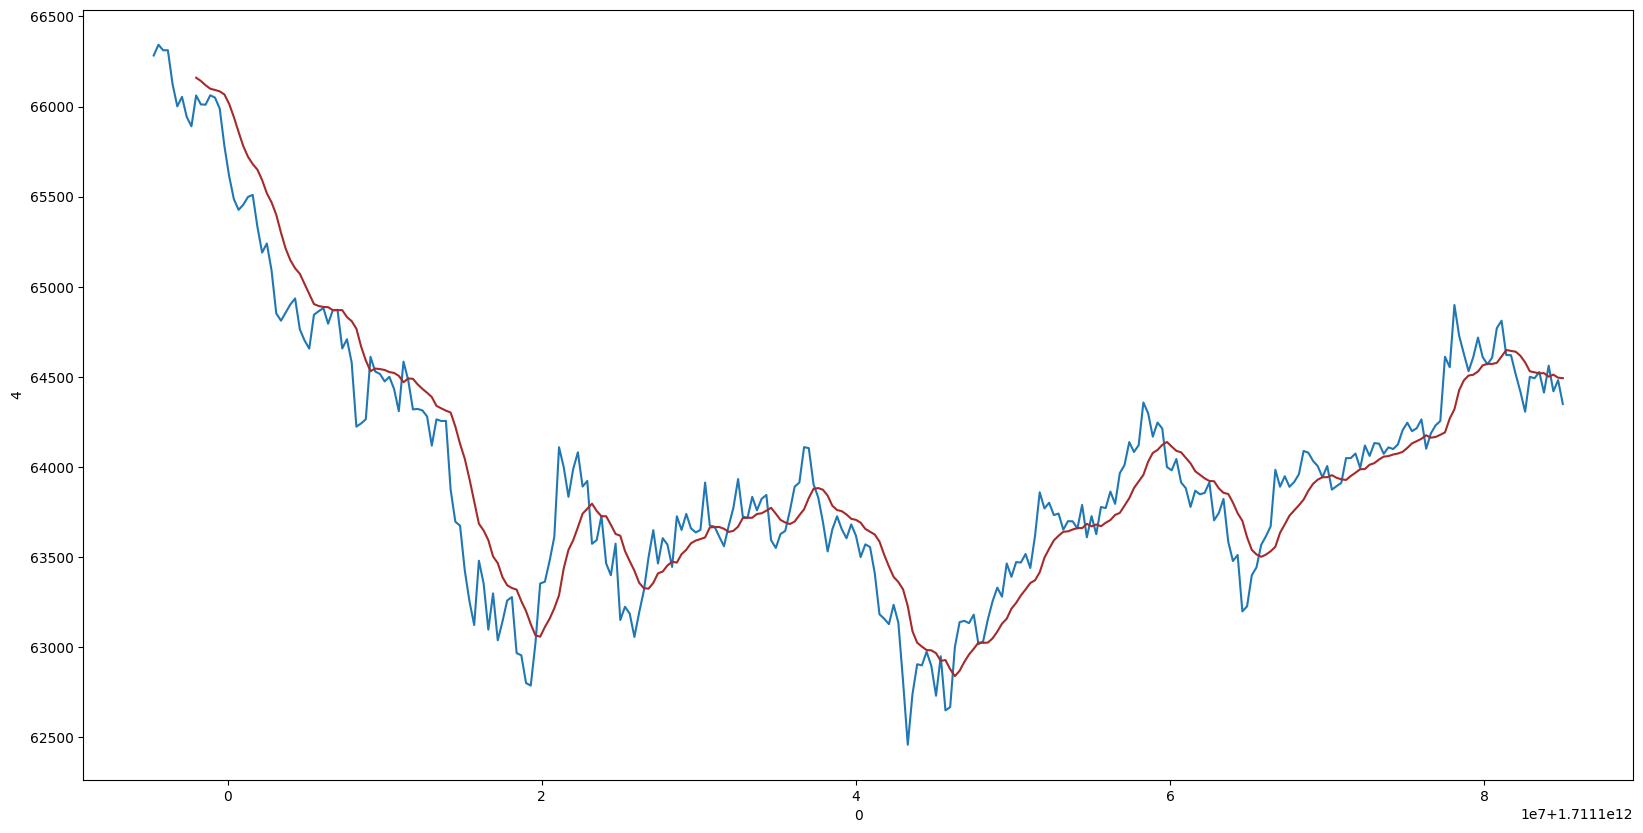

In [60]:
plt.figure(figsize=(20,10))
sns.lineplot(x=df[0],y=df[4],data=df)
sns.lineplot(x=df[0],y=df['ema'],color='brown')

In [2]:
try:
    retry=5
    while True:
        if retry==1:
            raise Exception
        print(retry)
        retry-=1
except:
    print('done')

5
4
3
2
done


In [1]:
exchange.private_get_position({"symbol":symbol})

NameError: name 'exchange' is not defined

In [1]:

import pandas as pd
import datetime
import ccxt
from datetime import datetime, timezone, timedelta

import pandas as pd
import pandas_ta as ta
import time
import json
import numpy as np

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import threading

from flask import Flask, render_template
from flask_cors import CORS


with open('./file_bitmex.json') as f:
    data = json.load(f)

    # Access the values from the loaded JSON data
    key_value = data["key"]
    secret_value = data["secret"]
    password_file = data["password"]


class bitmex_trading_bot:

    def __init__(self, exchange: str = "bitmex", symbol: str = "XBTUSDT", timeframe: str = "5m", size: int = 6000, limit: int = 100, takeprofit: float = 20, stoploss: float = 20):
        """
        Initialize the trading bot with default values for the exchange, symbol, timeframe, size, limit, take profit, and stop loss.

        Parameters:
            exchange (str): Name of the exchange. Default is "bitmex".
            symbol (str): Symbol for trading. Default is "XBTUSDT".
            timeframe (str): Timeframe for trading. Default is "5m".
            size (int): Size of the trade. Default is 2000.
            limit (int): Limit for the trade. Default is 100.
            takeprofit (int): Take profit percentage. Default is 25.
            stoploss (int): Stop loss percentage. Default is 20.

        Returns:
            None
        """

        self.exchange = exchange
        self.symbol = symbol
        self.timeframe = timeframe
        self.size = size
        self.limit = limit
        self.takeprofit = takeprofit
        self.stoploss = stoploss
        self.id = None
        self.isLong = False
        self.isShort = False

        # Initialize the exchange
        self.exchange_conn = eval(f'ccxt.{self.exchange}')({
            'enableRateLimit': True,
            'options': {
                'adjustForTimeDifference': True,
                'recvWindow': 50000,
                'defaultType': 'swap',
                'timeDifference': 5000
            },
            'apiKey': key_value,
            'secret': secret_value
        })

    # fetching the latest price

    def fetch_price(self):
        ''' 
        return: float=price

        '''
        price = self.exchange_conn.fetchTicker(
            self.symbol)['info']['lastPrice']
        return float(price)

    def check_open_orders(self):
        '''
        return: list = open orders
        '''
        return self.exchange_conn.fetchOpenOrders(self.symbol)

    def open_long(self):

        price = self.fetch_price()
        deviation = 0.1
        self.exchange_conn.privatePostOrder({"symbol": f"{self.symbol}",
                                             "ordType": "Limit",
                                             "side": "Buy",
                                             "timeInForce": "GTC",
                                             "quantity": f"{self.size}",
                                             "price": f"{price-deviation}",
                                             "execInst": "ParticipateDoNotInitiate"})
        return price

    def open_short(self):
        price = self.fetch_price()
        deviation = 0.1
        self.exchange_conn.privatePostOrder({"symbol": f"{self.symbol}",
                                             "ordType": "Limit",
                                             "side": "Sell",
                                             "timeInForce": "GTC",
                                             "quantity": f"{self.size}",
                                             "price": f"{price+deviation}",
                                             "execInst": "ParticipateDoNotInitiate"})
        return price

    def close_short(self):
        price = self.fetch_price()
        self.exchange_conn.privatePostOrder({"symbol": f"{self.symbol}",
                                             "ordType": "Limit",
                                             "side": "Buy",
                                             "timeInForce": "GTC",
                                             "quantity": f"{self.size}",
                                             "price": f"{price}",
                                             "execInst": "ReduceOnly"})

    def close_long(self):
        price = self.fetch_price()
        self.exchange_conn.privatePostOrder({"symbol": f"{self.symbol}",
                                             "ordType": "Limit",
                                             "side": "Sell",
                                             "timeInForce": "GTC",
                                             "quantity": f"{self.size}",
                                             "price": f"{price}",
                                             "execInst": "ReduceOnly"})

    def take_profit_long(self):
        # while self.exchange_conn.fetchOpenOrders(self.symbol) == []:
        if self.check_position() == True:
            price = float(self.exchange_conn.private_get_position({"symbol": self.symbol})[0]['avgEntryPrice'])

            self.exchange_conn.private_delete_order_all({"symbol": f"{self.symbol}"})

            while self.exchange_conn.fetchOpenOrders(self.symbol) == []:

                self.exchange_conn.privatePostOrder({"symbol": f"{self.symbol}",
                                                    "ordType": "Limit",
                                                    "side": "Sell",
                                                    "timeInForce": "GTC",
                                                    "quantity": f"{self.size}",
                                                    "price": f"{price+self.takeprofit}",
                                                    "execInst": "ReduceOnly"})

                self.takeprofit += 10
                time.sleep(2)

    def take_profit_short(self):
        # while self.exchange_conn.fetchOpenOrders(self.symbol) == []:
        if self.check_position() == True:
            self.exchange_conn.private_delete_order_all({"symbol": f"{self.symbol}"})

            price = float(self.exchange_conn.private_get_position({"symbol": self.symbol})[0]['avgEntryPrice'])

            while self.exchange_conn.fetchOpenOrders(self.symbol) == []:

                self.exchange_conn.privatePostOrder({"symbol": f"{self.symbol}",
                                                    "ordType": "Limit",
                                                    "side": "Buy",
                                                    "timeInForce": "GTC",
                                                    "quantity": f"{self.size}",
                                                    "price": f"{price-self.takeprofit}",
                                                    "execInst": "ReduceOnly"})

                self.takeprofit += 10
                time.sleep(2)

    def check_position(self):
        try:
            x = self.exchange_conn.private_get_position(
                {"symbol": self.symbol})
            if x == []:
                return False

            else:
                return x[0]['isOpen']

        except:
            return False

    def pnl_realised_profit(self):

        pnl = float(self.exchange_conn.private_get_position(
            {"symbol": self.symbol})[0]['unrealisedPnl'])
        qty = float(self.exchange_conn.private_get_position(
            {"symbol": self.symbol})[0]['currentQty'])

        pnl = pnl/float(10**6)
        qty = qty/float(10**6)

        if qty < 0:
            qty = qty*-1
            type_to_close = 'Buy'
            expected_profit = qty*self.takeprofit

        else:
            type_to_close = 'Sell'
            expected_profit = qty*self.takeprofit

        if pnl >= expected_profit:
            return True, type_to_close
        else:
            return False, None

    def logic_exec(self, id=None, isLong=False, isShort=False):

        # Get the OHLCV (Open, High, Low, Close, Volume) data
        ohlcv = self.exchange_conn.fetch_ohlcv(
            self.symbol, self.timeframe, since=None, limit=self.limit)

        # creating dataframe of ohlcv
        df = pd.DataFrame(ohlcv)

        df['ema'] = ta.ema(df[4], window=13)

        # PSAR
        d = ta.psar(df[2], df[3], df[4], 0.06, 0.06, 0.6)
        d1 = ta.ema(df[4][-14:-1], 13).iloc[-1]

    ##### getting latest value of candle and PSAR ####
        latest_val = d.iloc[-1]

    ### creating logic  #####

        if latest_val['PSARl_0.06_0.6'] > 0 and latest_val['PSARr_0.06_0.6'] == 1:
            if self.id == None and df[4].iloc[-1] > d1 and self.isLong != True:
                try:
                    retries_order = 11
                    while self.check_position() != True and retries_order > 0:
                        self.exchange_conn.private_delete_order_all(
                            {"symbol": self.symbol})
                        time.sleep(1)
                        self.open_long()
                        print('buy')
                        time.sleep(5)
                        retries_order -= 1
                        if retries_order == 1:
                            raise Exception

                    time.sleep(2)
                    self.take_profit_long()

                    self.id = True
                    self.isLong = True

                except:
                    self.id = None
                    self.isLong = False
                    self.isShort = False
                    print('Order Failed for long position')

            elif self.id != None and self.isShort:
                print('Short position close has been placed')

                while (self.check_position()):
                    self.exchange_conn.private_delete_order_all(
                        {"symbol": self.symbol})
                    self.close_short()
                    time.sleep(5)

                self.isLong = False
                self.isShort = False
                self.id = None

        elif latest_val['PSARs_0.06_0.6'] > 0 and latest_val['PSARr_0.06_0.6'] == 1:
            if self.id == None and df[4].iloc[-1] < d1 and self.isShort != True:

                try:
                    retries_order = 11

                    while self.check_position() != True and retries_order > 0:
                        self.exchange_conn.private_delete_order_all(
                            {"symbol": self.symbol})
                        time.sleep(1)
                        self.open_short()
                        print('sell')
                        time.sleep(5)
                        retries_order -= 1
                        if retries_order == 1:
                            raise Exception
                    time.sleep(2)
                    self.take_profit_short()

                    self.id = True
                    self.isShort = True

                except:
                    self.isShort = False
                    self.id = None
                    self.isShort = False
                    print('Order Failed for short position')

            elif self.id != None and self.isLong:
                print('Long position close has been placed')

                while (self.check_position()):
                    self.exchange_conn.private_delete_order_all(
                        {"symbol": self.symbol})
                    self.close_long()
                    time.sleep(5)

                self.isShort = False
                self.isLong = False
                self.id = None

        print("App is running")
        time.sleep(15)

        x = self.check_position()
        print(x)
        if x == False:
            self.exchange_conn.private_delete_order_all(
                {"symbol": self.symbol})
            self.id = None
            self.isLong = False
            self.isShort = False

        elif x == True:
            pnl_status, type_to_close = self.pnl_realised_profit()

            print(pnl_status, type_to_close)

            if pnl_status == True:
                if type_to_close == 'Buy':
                    while self.check_position() != False:
                        self.close_short()
                        time.sleep(5)
                        print('close short')

                elif type_to_close == 'Sell':
                    while self.check_position() != False:
                        self.close_long()
                        time.sleep(5)

            time.sleep(100)

        # return self.id,self.isLong,self.isShort
        return self.logic_exec(self.id, self.isLong, self.isShort)


class StreamlitApp:
    def __init__(self):
        self.is_running = False
        self.bot = None

    def run(self):

        bot = bitmex_trading_bot()
        bot.logic_exec()







In [2]:
bot = bitmex_trading_bot()

In [3]:
bot.take_profit_long()


In [15]:
price=65000
bot.exchange_conn.privatePostOrder({"symbol": f"{bot.symbol}",
                                                    "ordType": "Limit",
                                                    "side": "Buy",
                                                    "timeInForce": "GTC",
                                                    "quantity": f"{bot.size}",
                                                    "price": f"{price-bot.takeprofit}",
                                                    "execInst": "ReduceOnly,ParticipateDoNotInitiate"})

{'orderID': '16783ea7-da5c-4023-a42e-da12eff4030a',
 'clOrdID': '',
 'clOrdLinkID': '',
 'account': '2218030',
 'symbol': 'XBTUSDT',
 'side': 'Buy',
 'orderQty': '1000',
 'price': '64980',
 'displayQty': None,
 'stopPx': None,
 'pegOffsetValue': None,
 'pegPriceType': '',
 'currency': 'USDT',
 'settlCurrency': 'USDt',
 'ordType': 'Limit',
 'timeInForce': 'GoodTillCancel',
 'execInst': 'ParticipateDoNotInitiate,ReduceOnly',
 'contingencyType': '',
 'ordStatus': 'New',
 'triggered': '',
 'workingIndicator': True,
 'ordRejReason': '',
 'leavesQty': '1000',
 'cumQty': '0',
 'avgPx': None,
 'text': 'Submitted via API.',
 'transactTime': '2024-04-02T10:53:28.715Z',
 'timestamp': '2024-04-02T10:53:28.715Z'}